In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


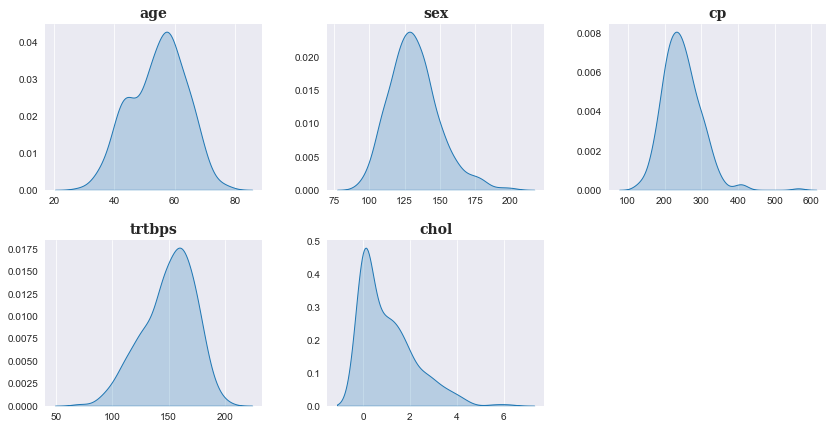

In [40]:
sns.set_style(style='darkgrid')

fig = plt.figure(figsize=(14, 11))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.3, hspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

axes = [ax0, ax1, ax2, ax3, ax4]

# Graphs
for i, ax in enumerate(axes):
    dp_legend = False
    if i in [2, 5, 8]:
        dp_legend = True
        
    #ax.set_facecolor(background_color)
    ax.set_title(df.columns[i], fontsize=14, fontfamily='serif', fontweight='bold')
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    
    sns.kdeplot(x=num_col[i], data=df, fill=True, ax=ax, legend=dp_legend)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

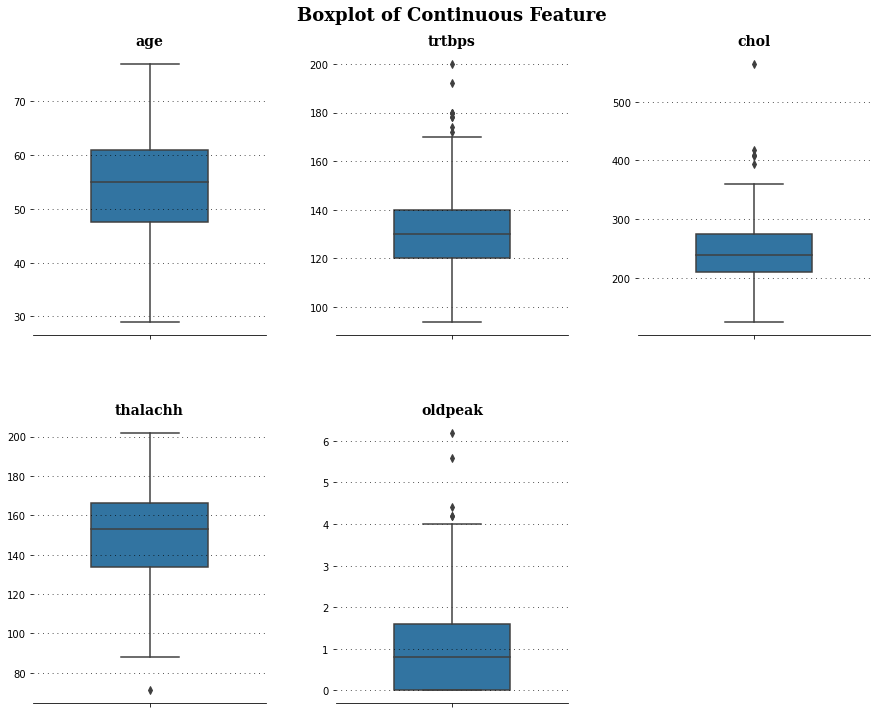

In [15]:
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.3, hspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
axes = [ax0, ax1, ax2, ax3, ax4]

# Graphs
for i, ax in enumerate(axes):
    #ax.set_facecolor(background_color)
    ax.set_title(num_col[i], fontsize=14, fontfamily='serif', fontweight='bold')
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    
    sns.boxplot(y=num_col[i], data=df, ax=ax, width=0.5)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

In [5]:
cat_col = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
num_col = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [8]:
dff = pd.get_dummies(df, columns=cat_col, drop_first=True)

In [10]:
X = dff.drop(columns='output')
Y = dff['output']

In [13]:
rob_scaler = RobustScaler()

In [15]:
X[num_col] = rob_scaler.fit_transform(X[num_col])

In [24]:
X.sample(5)

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
247,0.814815,1.5,0.094488,-1.015385,-0.5000,1,1,0,0,0,...,1,1,0,0,0,1,0,1,0,0
10,-0.074074,0.5,-0.015748,0.215385,0.2500,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
165,0.888889,1.5,0.724409,-1.384615,0.4375,1,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
9,0.148148,1.0,-1.133858,0.646154,0.5000,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
196,-0.666667,1.0,-0.141732,-0.184615,1.7500,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


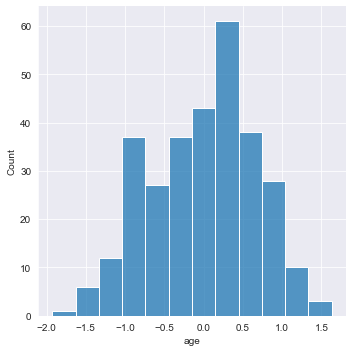

In [23]:
sns.set_style(style='darkgrid')
sns.displot(x='age', data=X)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", x_train.shape)
print("The shape of X_test is       ",x_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242,)
The shape of y_test is        (61,)


### Logistic Regression

In [77]:
logres = LogisticRegression()

In [78]:
logres.fit(x_train,y_train)

LogisticRegression()

In [79]:
logres.score(x_test,y_test)

0.9016393442622951

#### ROC Curve

In [80]:
pred_prob = logres.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred_prob)

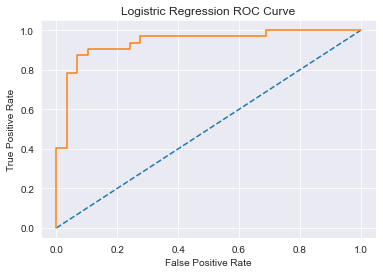

In [81]:
#plt.figure(figsize=(7,7))
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

In [82]:
roc_auc_score(y_test, pred_prob)

0.9396551724137931

<AxesSubplot:>

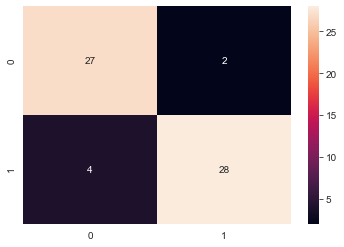

In [83]:
cm = confusion_matrix(y_test, logres.predict(x_test))
sns.heatmap(cm, annot=True)

### Random Forest

In [84]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [85]:

rfc.score(x_test,y_test)

0.8524590163934426

In [86]:
pred_prob = rfc.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred_prob)

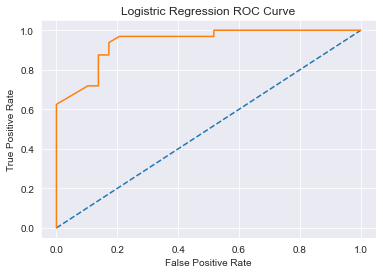

In [87]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

In [88]:
roc_auc_score(y_test, pred_prob)

0.9407327586206896

<AxesSubplot:>

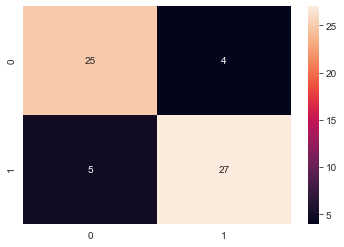

In [89]:
cm = confusion_matrix(y_test, rfc.predict(x_test))
sns.heatmap(cm, annot=True)